In [1]:
import pandas as pd    #dataframe library
import matplotlib.pyplot as plt  #plots data
import numpy as np     #provides n-dim opject support
from sklearn import svm 
from sklearn.preprocessing import Imputer , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder #replacing symbolic data with numeric

# load and review data


In [2]:
df = pd.read_csv("pima-data.csv") #load data

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.isnull().values.any()

False

In [5]:
df.shape

(768, 10)

In [6]:
diabetes_enc = LabelEncoder()
df['diabetes']=diabetes_enc.fit_transform(df['diabetes'])

In [7]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


([<matplotlib.axis.YTick at 0x1571d98a5f8>,
 <a list of 10 Text yticklabel objects>)

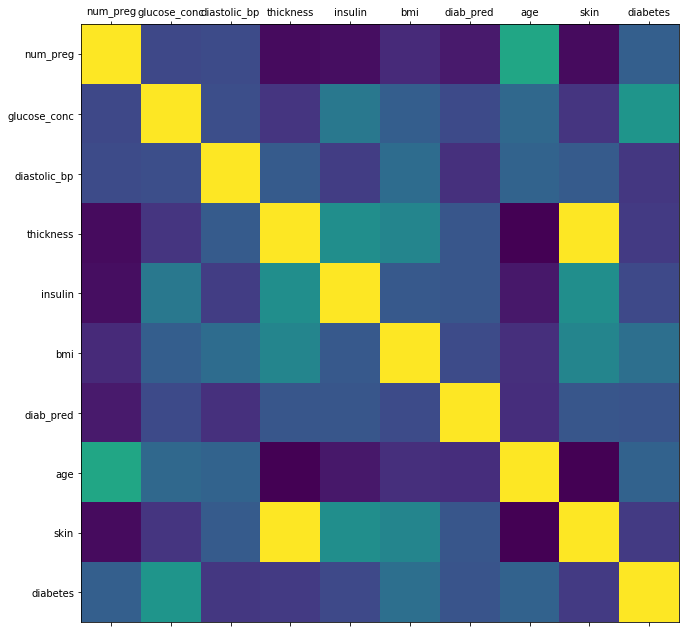

In [8]:
corr = df.corr()
fig , ax = plt.subplots(figsize=(11 , 11))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)) , corr.columns)
plt.yticks(range(len(corr.columns)) , corr.columns)

In [9]:
del df['skin']

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
print("num_preg {0}".format(len(df.loc[df['num_preg']==0])))
print("glucose_conc {0}".format(len(df.loc[df['glucose_conc']==0])))
print("diastolic_bp {0}".format(len(df.loc[df['diastolic_bp']==0])))
print("thickness {0}".format(len(df.loc[df['thickness']==0])))
print("insulin {0}".format(len(df.loc[df['insulin']==0])))
print("bmi {0}".format(len(df.loc[df['bmi']==0])))
print("diab_pred {0}".format(len(df.loc[df['diab_pred']==0])))
print("age {0}".format(len(df.loc[df['age']==0])))


num_preg 111
glucose_conc 5
diastolic_bp 35
thickness 227
insulin 374
bmi 11
diab_pred 0
age 0


In [12]:
df.drop(df[df['glucose_conc'] == 0].index , inplace = True)
df.drop(df[df['diastolic_bp'] == 0].index , inplace = True)
df.drop(df[df['bmi'] == 0].index , inplace = True)


# spliting data 
70% for training & 30% for testing

In [13]:
feature_col_names = ['num_preg' , 'glucose_conc' , 'diastolic_bp' , 'thickness' , 'insulin' , 'bmi' , 'diab_pred' , 'age' ]
predicted_class_names = ['diabetes'] 
x = df[feature_col_names].values
y = df[predicted_class_names].values


In [14]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
split_test_size=0.30
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=split_test_size, random_state=42) 
print("Labels for training and testing data")
print(y_train)
print(y_test)

Labels for training and testing data
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0

In [15]:
x_test.shape

(218, 8)

In [16]:
 x_train.shape

(506, 8)

In [17]:
max_glucose = max(df['glucose_conc'])
min_glucose = min(df['glucose_conc'])
max_diastolic = max(df['diastolic_bp'])
min_diastolic = min(df['diastolic_bp'])
max_thickness = max(df['thickness'])
min_thickness = min(df['thickness'])
max_insulin = max(df['insulin'])
min_insulin = min(df['insulin'])
max_bmi = max(df['bmi'])
min_bmi = min(df['bmi'])
max_diab = max(df['diab_pred'])
min_diab = min(df['diab_pred'])

In [18]:
fill0 = Imputer(missing_values = 0 , strategy = 'mean' , axis = 0)
df = fill0.fit_transform(df)

C:\Users\Esraa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
clf = svm.SVC(gamma = 'scale')
clf.fit(x_train , y_train)

C:\Users\Esraa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = clf.predict(x_test)

In [21]:
accuracy_score(y_test , y_pred)

0.7568807339449541

In [22]:
diabetes = {1 : "true" , 0 : "false"}

In [23]:
print("Number of pregnancy: ")
preg = input()
print("Enter glucose ( " , min_glucose , " : " , max_glucose , " )")
glucose = input()
print("Enter diastolic ( " , min_diastolic , " : " , max_diastolic , " )")
diastolic = input()
print("Enter thickness ( " , min_thickness , " : " , max_thickness , " )")
thickness = input()
print("Enter insulin ( " , min_insulin , " : " , max_insulin , " )")
insulin = input()
print("Enter bmi ( " , min_bmi , " : " , max_bmi , " )")
bmi = input()
print("Enter diab ( " , min_diab, " : " , max_diab , " )")
diab = input()
print("Age: ")
age = input()
input_diabetes = [preg , glucose , diastolic , thickness , insulin , bmi , diab , age]
#input_diabetes.extend(mean) 
input_diabetes = [input_diabetes]
output = clf.predict(input_diabetes)
output = output[0]
type(output)
print(diabetes[output])

Number of pregnancy: 
3
Enter glucose (  44  :  199  )
34
Enter diastolic (  24  :  122  )
56
Enter thickness (  0  :  99  )
47
Enter insulin (  0  :  846  )
387
Enter bmi (  18.2  :  67.1  )
22.67
Enter diab (  0.078  :  2.42  )
.2345
Age: 
23
false
